Experimenting with NMS using IoU and IoS metrics to remove tile boundary polygons
--

In [2]:
from tree_detection_framework.preprocessing.preprocessing import (
    create_dataloader,
    visualize_dataloader,
)
from tree_detection_framework.detection.detector import GeometricDetector
from tree_detection_framework.postprocessing.postprocessing import (
    merge_and_postprocess_detections,
    multi_region_hole_suppression,
    suppress_tile_boundary_with_NMS,
    single_region_hole_suppression,
    multi_region_NMS,
    single_region_NMS,
)
import time

In [3]:
dataloader = create_dataloader(
    raster_folder_path="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/chm.tif",
    chip_size=512,
    chip_stride=400,
    batch_size=3,
    output_resolution=0.2,
)

2025-01-02 16:47:22,287 - INFO - Units = Units.PIXELS
2025-01-02 16:47:22,287 - INFO - Stride = 400


In [4]:
detector = GeometricDetector(
    a=0.0045,
    res=dataloader.sampler.res,
    confidence_factor="distance",
    filter_shape="square",
)

predictions = detector.predict(dataloader)

Performing prediction on batches: 100%|██████████| 6/6 [00:41<00:00,  6.85s/it]


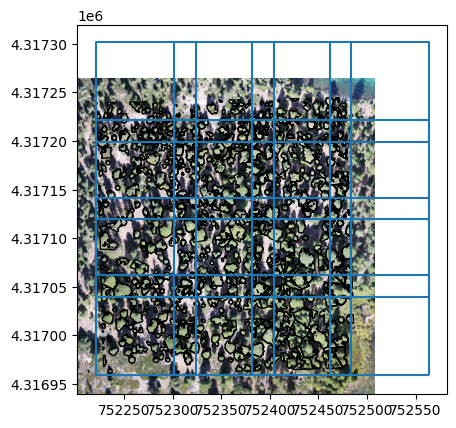

<Axes: >

In [5]:
predictions.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

IoU + IoS NMS to remove tile boundary predictions
--

/ofo-share/repos-amritha/conda/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
2025-01-02 16:49:42,927 - INFO - Bound have overlap, running across-region NMS
/ofo-share/repos-amritha/conda/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


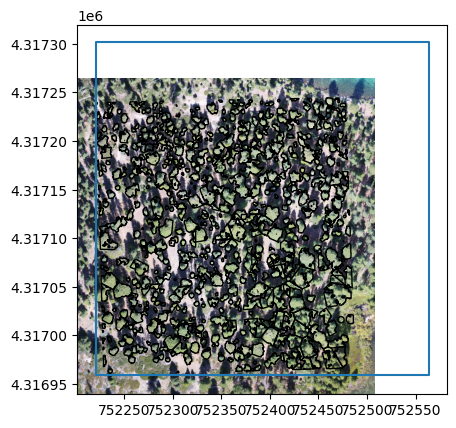

In [6]:
suppress_tile_boundary_with_NMS(predictions).plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

Step-wise visualization
--

/ofo-share/repos-amritha/conda/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
2024-12-31 03:01:24,435 - INFO - Bound have overlap, running across-region NMS
/ofo-share/repos-amritha/conda/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


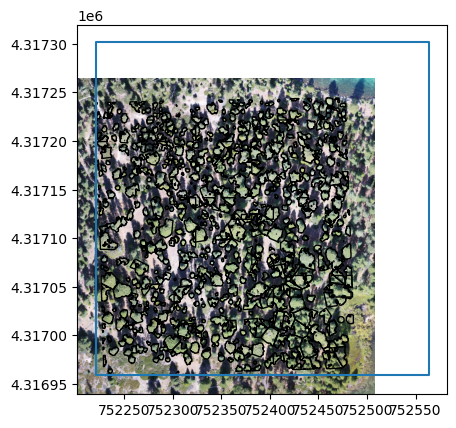

In [5]:
iou_nms = multi_region_NMS(predictions, intersection_method="IOU")
iou_nms.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

IoU +IoS NMS on non-normalized scores
---

/ofo-share/repos-amritha/conda/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


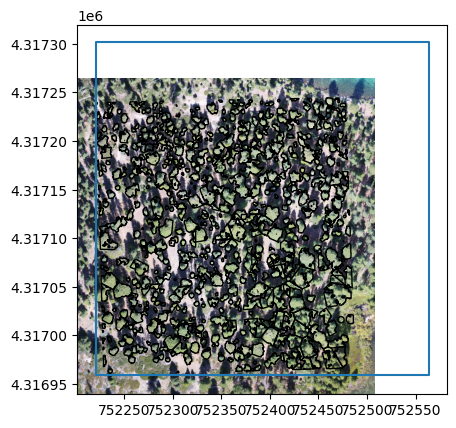

In [6]:
ios_nms = single_region_NMS(iou_nms, intersection_method="IOS")
ios_nms.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

IoU + IoS on min-max normalized scores
---

/ofo-share/repos-amritha/conda/envs/tree-detection-framework/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


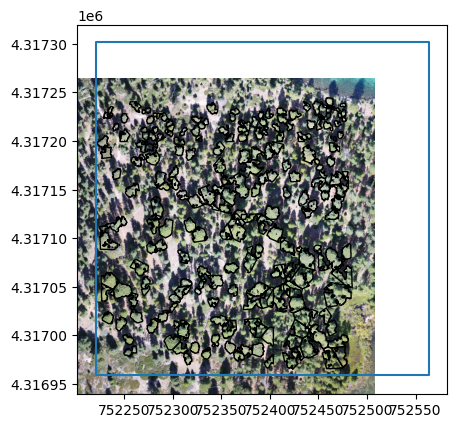

In [12]:
ios_nms = single_region_NMS(iou_nms, intersection_method="IOS")
ios_nms.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

Noticed loss of additional crowns when using normalized scores

Hole Suppression
--

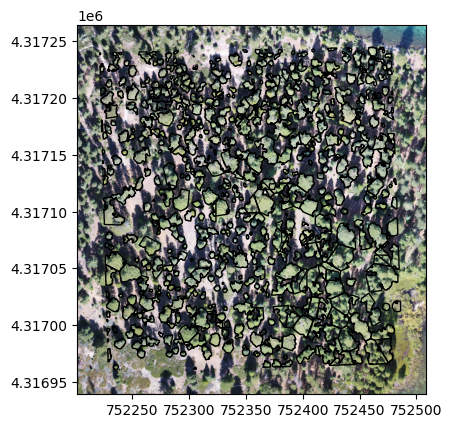

In [7]:
hole_suppression = single_region_hole_suppression(ios_nms)
hole_suppression.plot(
    raster_file="/ofo-share/cv-itd-eval_data/photogrammetry-outputs/emerald-point_10a-20230103T2008/ortho.tif"
)

In [8]:
hole_suppression.save(
    "/ofo-share/repos-amritha/extras/tdf/output_gpkgs/12-30-2024-postprocessed.gpkg"
)

2024-12-31 03:02:26,425 - INFO - Created 495 records
